###Customer Churn Prediction for Telecom
Industry: Telecommunications
Description: Predict which customers are likely to leave a telecom provider based on usage and demographic data.
Instructions:
1. Load and clean the dataset, handling categorical variables (e.g., one-hot encoding).
2. Perform exploratory data analysis (EDA) to identify key predictors (e.g., contract type, monthly charges).
3. Train a classification model (e.g., Decision Tree, Gradient Boosting).
4. Optimize the model using cross-validation and tune hyperparameters.
5. Visualize results with a feature importance plot.
Dataset: Telco Customer Churn Dataset (Kaggle)
Tools: Python, Pandas, Scikit-learn, Matplotlib

In [4]:
import zipfile
data=zipfile.ZipFile('/content/archive (11).zip', 'r')
data.extractall()
data.close()

In [7]:
!pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 4.2 MB/s eta 0:00:00


In [8]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import time
import seaborn as sns
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report

EDA

In [9]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
print("datatypes of attributes :\n", df.dtypes)
print('find missing values information :\n', df.isna().sum())
print('find the data is balanced or not :\n', df['Churn'].value_counts())

datatypes of attributes :
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
find missing values information :
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contra

In [6]:
df.head()

NameError: name 'df' is not defined

In [10]:
df.drop('customerID', axis=1, inplace=True)

In [13]:
df['TotalCharges'].replace(' ', pd.NA, inplace=True)
df.dropna(subset=['TotalCharges'], inplace=True)
df['TotalCharges'] = df['TotalCharges'].astype(float)

/tmp/ipython-input-729438867.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].replace(' ', pd.NA, inplace=True)


In [14]:
before_cols = df.columns
check_lst=['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn', 'customerID', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup','DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies','Contract', 'PaymentMethod']
balanced_lst=[i for i in before_cols if i not in check_lst]
print(balanced_lst)

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [15]:
before_cols = df.columns
le = LabelEncoder()
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    df[col]=le.fit_transform(df[col])
multi_class_cols = [
    'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup','DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies','Contract', 'PaymentMethod'
]
df = pd.get_dummies(df, columns=multi_class_cols, drop_first=True)
new_cols=[col for col in df.columns if col not in before_cols]
for col in new_cols:
    df[col]=df[col].astype(int)

In [16]:
print(new_cols)

['MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']


In [17]:
print(df.dtypes)

gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
MultipleLines_No phone service             int64
MultipleLines_Yes                          int64
InternetService_Fiber optic                int64
InternetService_No                         int64
OnlineSecurity_No internet service         int64
OnlineSecurity_Yes                         int64
OnlineBackup_No internet service           int64
OnlineBackup_Yes                           int64
DeviceProtection_No internet service       int64
DeviceProtection_Yes                       int64
TechSupport_No inter

In [16]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,0,0,0,0,0,0,0,0,1,0


In [18]:
print(df.corr())

                                         gender  SeniorCitizen   Partner  \
gender                                 1.000000      -0.001819 -0.001379   
SeniorCitizen                         -0.001819       1.000000  0.016957   
Partner                               -0.001379       0.016957  1.000000   
Dependents                             0.010349      -0.210550  0.452269   
tenure                                 0.005285       0.015683  0.381912   
PhoneService                          -0.007515       0.008392  0.018397   
PaperlessBilling                      -0.011902       0.156258 -0.013957   
MonthlyCharges                        -0.013779       0.219874  0.097825   
TotalCharges                           0.000048       0.102411  0.319072   
Churn                                 -0.008545       0.150541 -0.149982   
MultipleLines_No phone service         0.007515      -0.008392 -0.018397   
MultipleLines_Yes                     -0.008883       0.142996  0.142561   
InternetServ

In [19]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,-1:].values

In [20]:
#oversampling
os=SMOTE(random_state=1)
X_os,Y_os=os.fit_resample(X,Y)
print(f"THE VALUES COUNTS AFTER OVERSAMPLING:\n{pd.Series(Y_os).value_counts()}")

THE VALUES COUNTS AFTER OVERSAMPLING:
0    5428
1    5428
Name: count, dtype: int64


In [21]:
X_train,X_test,T_train,T_test=train_test_split(X_os,Y_os,test_size=0.3,random_state=18)

DECISION TREE TRAINING

In [24]:
dtc=DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, T_train)

DecisionTreeClassifier(random_state=42)

DECISION TREE Testing and Result

In [25]:
dtc_preds = dtc.predict(X_test)

Accuracy:  88.60914952410194
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89      1633
           1       0.90      0.87      0.88      1624

    accuracy                           0.89      3257
   macro avg       0.89      0.89      0.89      3257
weighted avg       0.89      0.89      0.89      3257

Confusion Matrix:  <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7bb31c5b7450>


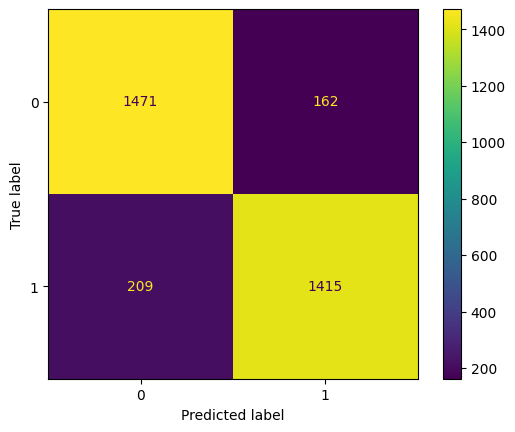

In [26]:
print('Accuracy: ', accuracy_score(T_test, dtc_preds)*100 )
print("Classification Report:\n", classification_report(T_test, dtc_preds))
print('Confusion Matrix: ', ConfusionMatrixDisplay.from_predictions(T_test, dtc_preds))

RANDOM FOREST TRAINING

In [27]:
rfc=RandomForestClassifier(random_state=42)
rfc.fit(X_train, T_train)

RandomForestClassifier(random_state=42)

RANDOM FOREST Testing and Result

In [28]:
rfc_preds = rfc.predict(X_test)

Accuracy:  91.18821000921093
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91      1633
           1       0.91      0.91      0.91      1624

    accuracy                           0.91      3257
   macro avg       0.91      0.91      0.91      3257
weighted avg       0.91      0.91      0.91      3257

Confusion Matrix:  <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7bb318960090>


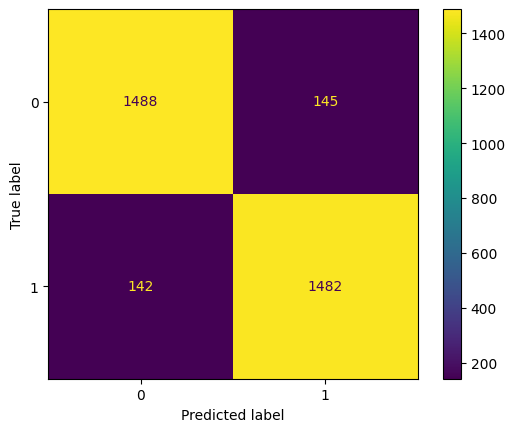

In [29]:
print('Accuracy: ', accuracy_score(T_test, rfc_preds)*100 )
print("Classification Report:\n", classification_report(T_test, rfc_preds))
print('Confusion Matrix: ', ConfusionMatrixDisplay.from_predictions(T_test, rfc_preds))

GradientBoostingClassifier Training

In [22]:
gbmodel=GradientBoostingClassifier()
gbmodel.fit(X_train, T_train)

GradientBoostingClassifier()

GradientBoostingClassifier Testing and Result

In [23]:
gdc_pred=gbmodel.predict(X_test)

Accuracy:  91.71016272643537
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92      1633
           1       0.91      0.93      0.92      1624

    accuracy                           0.92      3257
   macro avg       0.92      0.92      0.92      3257
weighted avg       0.92      0.92      0.92      3257

Confusion Matrix:  <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x794cdee6b090>


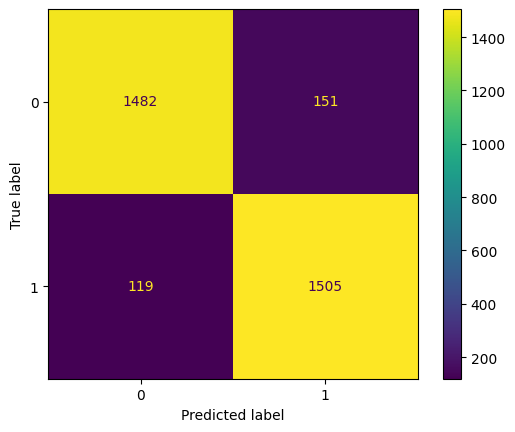

In [24]:
print('Accuracy: ', accuracy_score(T_test, gdc_pred)*100 )
print("Classification Report:\n", classification_report(T_test, gdc_pred))
print('Confusion Matrix: ', ConfusionMatrixDisplay.from_predictions(T_test, gdc_pred))

In [25]:
param_grid={
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

gb = GradientBoostingClassifier(random_state=42)

grid_search=GridSearchCV(gb, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, T_train)

best_gb_model=grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}


Test Accuracy: 0.9183297513048818
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      1633
           1       0.90      0.94      0.92      1624

    accuracy                           0.92      3257
   macro avg       0.92      0.92      0.92      3257
weighted avg       0.92      0.92      0.92      3257



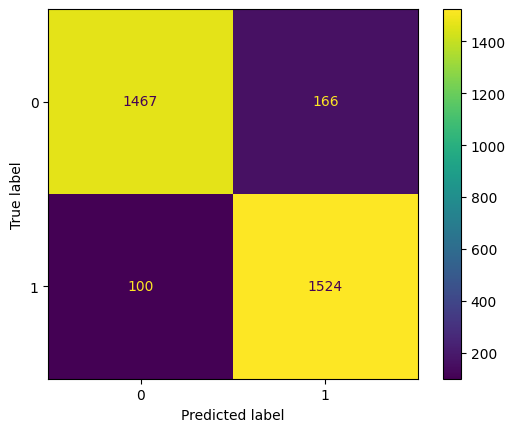

In [26]:
y_pred = best_gb_model.predict(X_test)


accuracy=accuracy_score(T_test, y_pred)
print("Test Accuracy:", accuracy)
print(classification_report(T_test, y_pred))
ConfusionMatrixDisplay.from_estimator(best_gb_model, X_test, T_test)

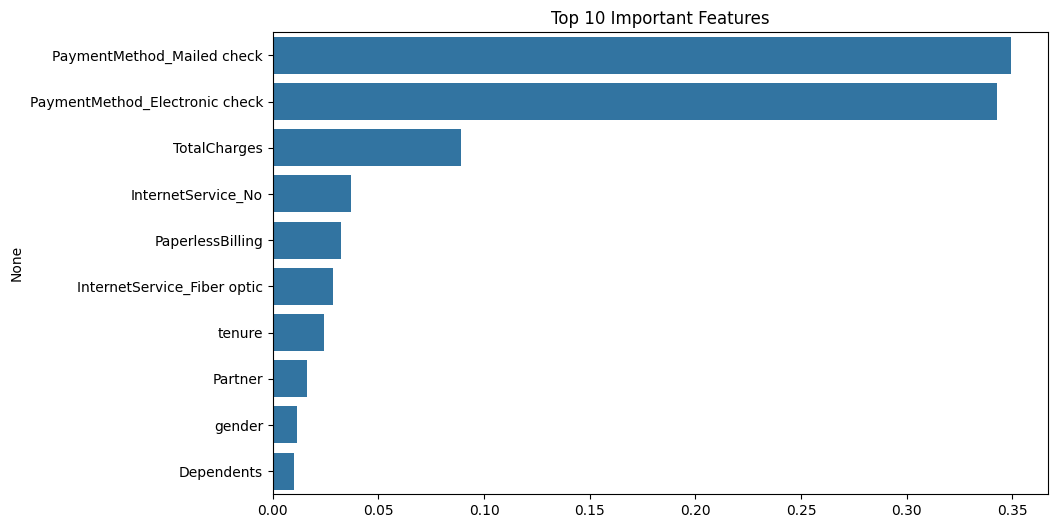

In [27]:
feat_imp = pd.Series(best_gb_model.feature_importances_, index=df.drop('Churn', axis=1).columns)
top_features = feat_imp.sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top 10 Important Features")
plt.show()